In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import sys #sys needed only for python version
#display versions of python and packages
print('\npython version ' + sys.version)
print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
#show plots in notebook
%matplotlib inline

# grab saved dataset
df = pd.read_pickle('dataset.pkl')
#show the first 5 rows
print(df.sample(n=5))

/Users/cohare/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):



python version 3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version 0.19.2
numpy version 1.11.3
                      username       password  username length  \
1686169                casey3c        2cdanni                7   
6935957                  otsed         m148ex                5   
636633                anas.cha  Fktrcfylhjdyf                8   
875275              asold-cool   asdfghjkl111               10   
2742104  dyabliithoo0_ily-xddb       qqathiia               21   

         password length       username pattern password pattern  
1686169                7                aaaaa0a          0aaaaaa  
6935957                6                  aaaaa           a000aa  
636633                13               aaaa&aaa    Aaaaaaaaaaaaa  
875275                12             aaaaa&aaaa     aaaaaaaaa000  
2742104                8  aaaaaaaaaaa0&aaa&aaaa         aaaaaaaa  


In [2]:
# Retreived from http://stackoverflow.com/questions/195010/how-can-i-split-multiple-joined-words/195024#195024
# User Darius Bacon. Viterbi algorithm. Edited by Casey O'Hare to conform with data.
import re
from collections import Counter

def viterbi_segment(text):
    text = replaceNumbers(text)
    text = text.lower()
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower()) 
def replaceNumbers(text):
    text = str(text)
    text = text.replace('0','o')
    text = text.replace('1','l')
    text = text.replace('2','')
    text = text.replace('3','e')
    text = text.replace('4','a')
    text = text.replace('5','s')
    text = text.replace('6','g')
    text = text.replace('7','t')
    text = text.replace('8','')
    text = text.replace('9','')
    return text
dictionary = Counter(words(open('words3.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))

In [11]:
# Temporarily using random set, because dataset takes too long to run
dfWords = pd.DataFrame(columns=['wordsUser', 'wordsPass'])
import random
index = 0
rands = random.sample(range(1, len(df['password'])), 10000)
index = 0
for i in rands:
    wordsSep = viterbi_segment(str(df['password'][i]))
    for word in wordsSep[0]:
        if len(word) >= 3:
            dfWords.loc[index] = ['', word]
            index += 1
wordsPass_counts = dfWords['wordsPass'].value_counts()
print(wordsPass_counts.nlargest(20))

leas        142
lol          77
loo          61
lea          45
all          43
loe          40
love         37
ell          35
otl          33
oao          32
loll         32
big          32
lot          32
qwerty       31
sss          29
elo          28
password     28
dog          28
ltg          27
ltl          26
Name: wordsPass, dtype: int64


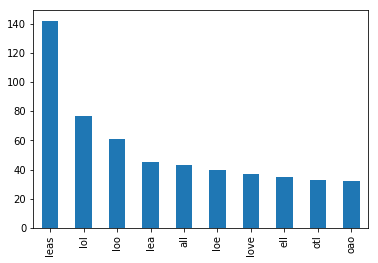

In [13]:
wordsPass_counts.nlargest(10).plot(kind='bar')